### *Instructions: Execute each cell by clicking 'Run' in the toolbar (you can also do this by pressing 'Shift' + 'Enter'). Some cells require input from you. In order that the script runs correctly, please make sure that the names of files are correct, in the correct directory, and that the contents of this script are not changed.*

***The csv downloaded from AIM contains confidential information; thus this script is not allowed to be run off campus. The csv must be properly deleted after identifiers are removed and the new data exported to a pickled file***

A note about shortcuts and code syntax: While I have worked hard to make this script accessible to everyone, there are a few things that you can do to make working with this script more powerful for yourself

-If you are working inside of a cell, and wish to come out of that cell, press the `Esc` key

-Pressing `m` while a cell is selected (but not active), will convert that cell's output into 'Markdown' (i.e., the language used to display this text). Pressing `y` will convert it back to code

-Highlighting code and pressing `Crtl` + `/` will comment out/in the code. Python uses `#` to denote comments, which also tells the interpreter to ignore that particular line of code. A few cells in this script give you the opportunity to look at the data. Using the keyboard shortcut above, you can make that line of code and active. You can also simply delete the `#` in front of the code

-If you wish to insert a cell, click outside of the cell above/below the location where you wish to place your cell. Press `a` to insert your cell above that cell, and `b` to place your cell below the current cell. If you wish to delete a cell, click outside of the cell you wish to delete, and click the cut (scissors) icon in the toolbar

-Python allows for strings to be entered as either `''` or `""`, but whatever you choose, it must be consistent. If you need to add a string somewhere, keep this in mind

-`ods.shape` prints out (displays) the number of columns and rows; `ods.info()` prints out an info summary about null-values, number of rows and columns, dtypes, column names, etc...(generally the most useful when looking for a high-level overview); `ods.columns` prints out the column names; `ods.head(x)\ods.tail(x)` will print out the *x* number of rows from the top/bottom (*note that x>50 will still generally result in data being cut off when printed to screen*)

In [41]:
# By convention, we use the alias 'pd' for pandas
import pandas as pd
import glob
import numpy as np

**Place one or more csv files downloaded from the ODS portal in the current working directory (i.e., the folder this script is running from)**

In [42]:
filenames = glob.glob('*.csv')
filenames

['export (1).csv',
 'export (2).csv',
 'export (3).csv',
 'export (4).csv',
 'export.csv']

In [43]:
list_of_dfs = [pd.read_csv(filename) for filename in filenames]
ods = pd.concat(list_of_dfs, ignore_index=True)

*Run the next cell to look at the names of all the columns*

In [44]:
# Call the 'columns' attribute to look at the column names
ods.columns

Index(['SchoolID', 'StudentName', 'CRN', 'Subject', 'Course', 'Section',
       'ClassTitleComplete', 'Exam Date', 'ProctorLastName', 'InstructorName',
       'InstructorEmail', 'LocationName', 'Start Time', 'End Time',
       'Total Length', 'Scheduled By', 'Actual Start Time', 'Actual End Time',
       'Actual Total Length', 'Exam Completed', 'No Show', 'Tags', 'TechTags',
       'Barcode', 'First Entered', 'File Uploaded', 'Received As Paper Copy',
       'Rescheduled', 'StudentLastName', 'StudentFirstName',
       'Access to speech-to-text software', 'Access to standing desk',
       'Assessments administered in two parts', 'Breaks during exams',
       'Colored paper for exams and classroom materials',
       'Electronic Reader for Online Exams',
       'Exams and classroom materials in 18 point font or larger',
       'Exams and classroom materials in 24 point font or larger',
       'Extra Time 1.50x', 'Extra Time 1.5x Calculation-based exams',
       'Extra Time 1.5x Writing-ba

*We need to remove 'SchoolID', 'StudentName', 'CRN', 'Course', 'ClassTitleComplete', 'InstructorName', 'InstructorEmail', 'Scheduled By','StudentLastName', 'StudentFirstName', 'InstructorEmail' from the dataframe, since these contain confidential information.*

**Verify that the column names are listed above, then execute the cell below**

In [45]:
ods.drop(columns=['SchoolID', 'StudentName', 'CRN', 'Course', 'ClassTitleComplete', 'InstructorName', 'InstructorEmail', 'Scheduled By',
        'StudentLastName', 'StudentFirstName', 'InstructorEmail'], inplace=True)

**The following are largely irrelevant to test center operations, or the sheer amount of null values make it prohibitive to deal with them**

In [46]:
ods.drop(columns=[
    'TechTags', 'Barcode', 'Access to speech-to-text software', 'Access to standing desk', 'Assessments administered in two parts', 'Electronic Reader for Online Exams',
    'Extra Time 1.5x Calculation-based exams', 'Extra Time 1.5x Writing-based exams', 'Extra time 2.00x Calculation-based exams',
    'Extra time 2.0x Writing-based exams', 'Leniency on spelling and grammar when it is not part of the material being tested',
    'Live Reader for exams', 'ODS Proctor', 'Paper version of computerized calculation-based exams', 
    'Permission to bring food/drinks into testing environment', 'Reduced distraction calculation-based exams', 'Scribe for exams', 
    'Student may alternate between sitting and standing while testing', 'Student may handwrite exam responses'
], inplace = True)

*If you wish to see how certain characterisics of the dataframe right now, highlight the code you wish to run and press `Crtl` + `/`(note, this is optional)*

**Drop values that have the "Not Available" html script**

In [47]:
index = ods.loc[ods['End Time']=='<font class=red"><abbr title="Not Available">N/A</abbr></font>"'].index
ods.drop(index=index, inplace=True)

*Use this opportunity to look at the data by 'uncommenting' the line of code you wish to run (note, refer to the beginning of the script for help)*

In [48]:
# ods.shape
# ods.info()
# ods.head(25)
# ods.tail(25)

*Since the occurence of large size font for exams is limited compared to the total number of exams that ODS proctors, and it is the Instructor's duty to provide the large size font, we can drop these as well.*

**Drop additional unneeded columns**

In [49]:
ods.drop(columns=['Colored paper for exams and classroom materials', 'Exams and classroom materials in 18 point font or larger', 
                  'Exams and classroom materials in 24 point font or larger', 
                  'Tags', 'Use of a calculator for assessments with a calculation component',
                  'Paper version of computerized exams', 'Use of computer to type written exam responses', 
                  'Medical alert device'],
                  inplace=True)

## Checking Dtypes and Filling Null Values

**Covert the datetime columns to datetime64 dtype**

In [50]:
ods['Exam Date'] = ods['Exam Date'].astype('datetime64')
ods['First Entered'] = ods['First Entered'].astype('datetime64')
ods['Start Time'] = ods['Start Time'].astype('datetime64').dt.time
ods['End Time'] = ods['End Time'].astype('datetime64').dt.time
ods['Actual Start Time'] = ods['Actual Start Time'].astype('datetime64').dt.time
ods['Actual End Time'] = ods['Actual End Time'].astype('datetime64').dt.time

In [51]:
ods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11216 entries, 0 to 11239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Subject                                   11216 non-null  object        
 1   Section                                   11216 non-null  int64         
 2   Exam Date                                 11216 non-null  datetime64[ns]
 3   ProctorLastName                           7920 non-null   object        
 4   LocationName                              10890 non-null  object        
 5   Start Time                                11216 non-null  object        
 6   End Time                                  11216 non-null  object        
 7   Total Length                              11216 non-null  int64         
 8   Actual Start Time                         7682 non-null   object        
 9   Actual End Time             

**Rename the columns**

In [52]:
mapper = {'First Entered': 'first_entered', 'Exam Date': 'exam_date', 'Start Time': 'start_time', 'End Time': 'end_time', 'Actual Start Time': 'actual_start',
         'Actual End Time': 'actual_end'}
ods.rename(columns=mapper, inplace=True)

**Rename the Total and Actual Length Columns and change dtype for actual time to float64**

In [53]:
ods['allotted_time'] = ods['Total Length']
ods['actual_time'] = ods['Actual Total Length']

# Convert 'Alloted_Time to match the data with actual time 
ods['allotted_time'] = ods['allotted_time'].astype('float64')


# Drop Total Length and Actual Length
ods.drop(columns=['Actual Total Length', 'Total Length'], inplace=True)

**We will also drop 'Reduced Distraction Environment' since all students testing at ODS test in an isolated environment regardless of accommodation**

In [54]:
ods.drop(columns=['Reduced Distraction Environment'], inplace=True)

**We need to handle null values. Replace all null values in categorical columns with "No."**

In [55]:
# Create variable to store the index of columns that we want to work with
cat_cols = ods.select_dtypes(exclude=['number', 'datetime64']).columns

#Drop the remaining columns that don't take 'yes/no' responses
cat_cols = cat_cols.drop(['Subject', 'LocationName','ProctorLastName', 'actual_start', 'actual_end'])

# Use '.fillna()' to fill in the null values with 'No'
ods[cat_cols] = ods[cat_cols].fillna('No')

**Let's fill the null values in 'Rescheduled' with 0.0**

In [56]:
# Set null values for rescheduled to be 0.0
ods['Rescheduled'].fillna(0.0, inplace=True)

**Let's handle the null values for 'ProctorLastName'. Set these vaules to be 'Unspecified'**

In [57]:
ods['ProctorLastName'].fillna('Unspecified', inplace=True)

**Fill 'NaT' Values with the value of the exam start and finish times**

In [58]:
ods['actual_start'].fillna(ods['start_time'], inplace=True)
ods['actual_end'].fillna(ods['end_time'], inplace=True)

In [59]:
ods.columns

Index(['Subject', 'Section', 'exam_date', 'ProctorLastName', 'LocationName',
       'start_time', 'end_time', 'actual_start', 'actual_end',
       'Exam Completed', 'No Show', 'first_entered', 'File Uploaded',
       'Received As Paper Copy', 'Rescheduled', 'Breaks during exams',
       'Extra Time 1.50x', 'Extra Time 2.00x',
       'Make-up exams due to disability',
       'Permission to mark on exam - No scantron', 'Reader for exams',
       'allotted_time', 'actual_time'],
      dtype='object')

**Create a new column to store 'exam_cancelled' values**

In [60]:
ods['exam_cancelled'] = ods['Exam Completed']=='No'
ods['no_show'] = ods['No Show'] == 'Yes'


**Drop 'Exam Completed' and 'No Show'**

In [61]:
ods.drop(['Exam Completed'], axis=1, inplace=True)
ods.drop(['No Show'], axis=1, inplace=True)

In [62]:
index = ods.loc[(ods['actual_start'].isna()) & 
            (ods['exam_cancelled']=='Yes') & (ods['no_show']=='No')].index

ods.drop(index=index, inplace = True)

**Create a column that stores the amount of days a request was submitted before the exam**

In [63]:
ods['days_requested_submitted_in_advance'] = (ods['exam_date'].dt.date - ods['first_entered'].dt.date)/pd.Timedelta(days=1)

**Before we continue, we need to dress things up a bit. Recast the dtypes for LocationName and First Entered**

In [64]:
ods[['LocationName']] = ods[['LocationName']].astype('string')

# ods['First Entered'] = ods['First Entered'].astype('datetime64', errors='ignore')

**Change the names of the columns to something more concise**

In [65]:
mapperDict = {'Subject':'subject', 'Course': 'course', 'Section':'section', 'ProctorLastName':'proctor',
                      'LocationName':'room_number', 'First Entered':'firstEntered', 'File Uploaded':'fileUploaded',
                      'Received As Paper Copy': 'received_as_paper_copy',
                      'Rescheduled':'rescheduled', 'Breaks during exams': 'breaks_during_exams',
                      'Extra Time 1.50x':'extra_time_1.50x', 'Extra Time 2.00x': 'extra_time_2.00x',
                      'Make-up exams due to disability':'makeup_accommodation',
                      'Permission to mark on exam - No scantron':'noScantronExam', 'Reader for exams': 'readerForExams'}



ods.rename(columns = mapperDict, inplace = True)

**Change nulls in 'room_number' to 'Not Specified'**

In [66]:
ods['room_number'].fillna('Not Specified', inplace=True)

In [67]:
ods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11216 entries, 0 to 11239
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   subject                              11216 non-null  object        
 1   section                              11216 non-null  int64         
 2   exam_date                            11216 non-null  datetime64[ns]
 3   proctor                              11216 non-null  object        
 4   room_number                          11216 non-null  string        
 5   start_time                           11216 non-null  object        
 6   end_time                             11216 non-null  object        
 7   actual_start                         11216 non-null  object        
 8   actual_end                           11216 non-null  object        
 9   first_entered                        11216 non-null  datetime64[ns]
 10  fileUpload

<AxesSubplot:>

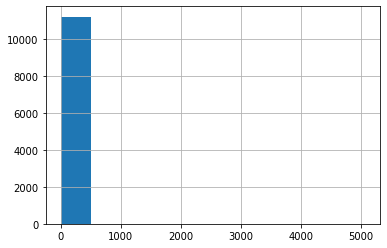

In [69]:
ods['allotted_time'].hist()

In [68]:
ods['start_time'].astype('datetime64').dt.time

TypeError: <class 'datetime.time'> is not convertible to datetime

**Name the exported file (Do not add the extension)**

In [33]:
reg_file=input("Enter the name of the file you wish to use for regular semester (Don't add the extension): ")
# finals_file = input("Enter the name of the file you wish to use for final exams (Don't add the extension): ")

Enter the name of the file you wish to use for regular semester (Don't add the extension): ods_072021


In [34]:
ods.to_pickle(f'{reg_file}.pkl')
# odsFinals.to_pickle(f'{finals_file}.pkl')